### Student Information
Name: 李柏葳

Student ID: 111065525

GitHub ID: bowen1248

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

## 1. Firstpart
Do the take home exercises in the DM2022-Lab1-Master.

### Data Preprocess
Create dataframe for 20 newsgroup dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
# Custom helper function
import helpers.data_mining_helpers as dmh

# Only categories in 20 newsgroup dataset we will load 
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# Load dataset into dict of lists
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
# Construct dataframe from a list
# Note: format_rows only return list of formatted data (article)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# Add category to the dataframe
X['category'] = twenty_train.target

# Add category label also
# Note: retrun list of target_names
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


### Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [3]:
### To slice the rows  
X[1:10:3]

### To show the dataframe in reverse order 
X[-1:-10:-1]

text  category  \
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

               category_name  
2256                 sci.med  
2255                 sci.med  
2254                 sci.med  
2253                 sci.med  
2252                 sci.med  
2251                 sci.med  
2250             alt.atheism  
2249  soc.religion.christian  
2248           comp.graphics

In [4]:
# Selecting first ten rows with category is 2 or 3
X[(X["category"] == 2) | (X["category"] == 3)][:10]

text  category  \
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   

             category_name  
2   soc.religion.christian  
3   soc.religion.christian  
4   soc.religion.christian  
5   soc.religion.christian  
6   soc.religion.christian  
7                  sci.med  
8                  sci.med  
9                  sci.med  
10  soc.religion.christian  
16                 sci.med

In [5]:
# Pick rows with over 40000 chars long in text
X[[len(text) > 40000 for text in X["text"]]]

text  category  \
400   From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...         1   
433   From: tgl+@cs.cmu.edu (Tom Lane) Subject: JPEG...         1   
768   From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...         1   
1403  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
1890  From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...         1   

      category_name  
400   comp.graphics  
433   comp.graphics  
768   comp.graphics  
1403    alt.atheism  
1890  comp.graphics

### Exercise 5 (take home)
Please check the data and the process below, describe what you observe and why it happened.
𝐻𝑖𝑛𝑡: why .isnull() didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]
# Convert to dataframe
NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In pandas official documentation:
`pandas.isnull()` function takes a scalar or array-like object and indictates whether values are missing.
(NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).
So in example above, A is Nan, B does not have 'missing_example' key which is equivalent to `None`, C is String, D is String, E is `None`, F is empty string.
Since C, D, F is string type, they are not null. If we want to filter out empty string as well, use following cell.

In [8]:
# String you want to fliter
fliter = ''
result = NA_df['missing_example'].isnull()
# Iterate through isnull list
for idx, row in result.iteritems():
    # Check if row's string is equal to fliter
    if NA_df['missing_example'][idx] == fliter:
        result[idx] = True
result

0     True
1     True
2    False
3    False
4     True
5     True
Name: missing_example, dtype: bool

### Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
# Get random samples
X_sample = X.sample(n=1000)

In [10]:
# Row counts of dataframe
print("The row counts of the X is", len(X))
print("The row counts of the samples of X is",len(X_sample))

The row counts of the X is 2257
The row counts of the samples of X is 1000


In [11]:
# Index of the sample data is out of order
X_sample[:10]

text  category  \
1062  From: perry@dsinc.com (Jim Perry) Subject: Re:...         0   
1738  From: mdw33310@uxa.cso.uiuc.edu (Michael D. Wa...         3   
1222  From: rubery@saturn.aitc.rest.tasc.com. (Dan R...         1   
312   From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2   
1447  From: mz@moscom.com (Matthew Zenkar) Subject: ...         1   
1355  From: tas@pegasus.com (Len Howard) Subject: Re...         2   
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0   
1421  From: aron@tikal.ced.berkeley.edu (Aron Bonar)...         1   
161   From: clldomps@cs.ruu.nl (Louis van Dompselaar...         1   
2017  From: caralv@caralv.auto-trol.com (Carol Alvin...         3   

               category_name  
1062             alt.atheism  
1738  soc.religion.christian  
1222           comp.graphics  
312                  sci.med  
1447           comp.graphics  
1355                 sci.med  
60               alt.atheism  
1421           comp.graphics  
161            comp.graphics  
2017  soc.religion.christian

In [12]:
# The ratio of each category is a little bit difference 
print("Ratio of categories in X dataset")
print(X['category_name'].value_counts(normalize=True))
print("Ratio of categories in X_sample dataset")
print(X_sample['category_name'].value_counts(normalize=True))

Ratio of categories in X dataset
soc.religion.christian    0.265397
sci.med                   0.263181
comp.graphics             0.258751
alt.atheism               0.212672
Name: category_name, dtype: float64
Ratio of categories in X_sample dataset
comp.graphics             0.278
sci.med                   0.264
soc.religion.christian    0.257
alt.atheism               0.201
Name: category_name, dtype: float64


### Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.
Link: https://i.imgur.com/9eO431H.png

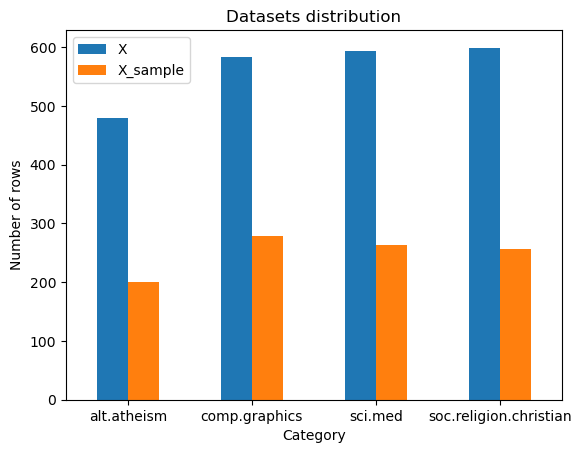

In [13]:
# Create dataframe based on each category numbers
df = pd.DataFrame({'X': X.category_name.value_counts(),
                   'X_sample': X_sample.category_name.value_counts()})
ax = df.plot.bar(rot=0)
ax.set_xlabel('Category')
ax.set_ylabel('Number of rows')
ax.set_title('Datasets distribution')
ax.legend()

### Exercise 10 (take home):
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another `1` in the same record. Can you provide code that can verify what word this `1` represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
import helpers.data_mining_helpers as dmh

# Change text to list of words
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
#learn the vocabulary and return document-term matrix
X_counts = count_vect.fit_transform(X.text)

[nltk_data] Downloading package punkt to /home/bowen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
# Get fifth record array
X_counts_array = (X_counts[4].toarray())[0]

# Record the no. of word appear
appear_word_count = 0

for i in range(100):
    # If record's ith place is 1
    if X_counts_array[i] == 1:
        appear_word_count += 1
        # If it is second word appear in record
        if appear_word_count == 2:
            print("The another 1 in the fifth record is representing", count_vect.get_feature_names_out()[i])

The another 1 in the fifth record is representing 01


### Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

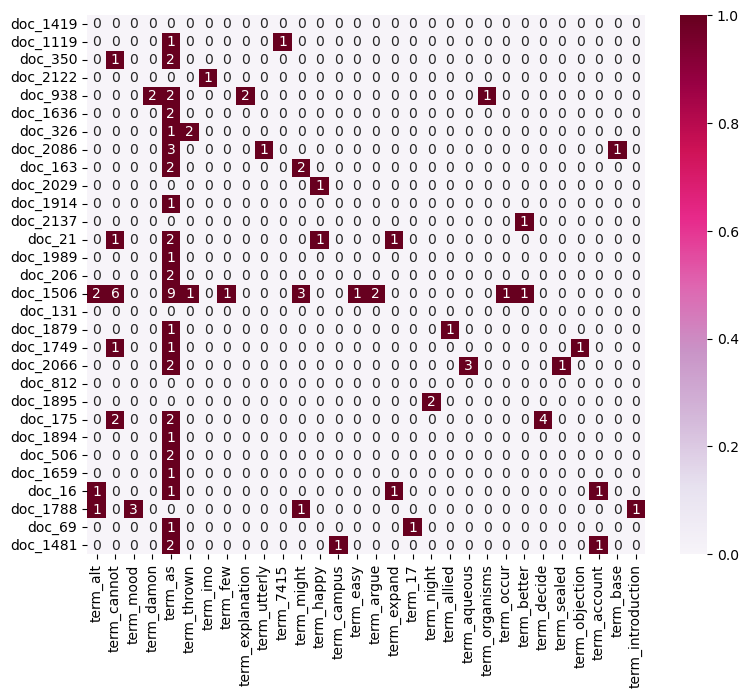

In [16]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from random import sample 
import matplotlib.pyplot as plt

# Get 30 random documents
X_30_samples = X.sample(30)
# Get word count from selected samples
X_30_sample_counts_vect = CountVectorizer()
X_30_sample_counts = X_30_sample_counts_vect.fit_transform(X_30_samples.text).toarray()
# Generate 30 different word to analysis
random_indexs = sample(range(len(X_30_sample_counts[0])), 30)

# Store terms in x axis
tmp_x = []
# Store document number in y axis
tmp_y = []
# Store data
tmp_z = np.zeros((30, 30))

for i in range(30):
    tmp_x.append(X_30_sample_counts_vect.get_feature_names_out()[random_indexs[i]])
    tmp_y.append(X_30_samples.index[i])
    for j in range(30):
        tmp_z[i][j] = X_30_sample_counts[i][random_indexs[j]]

plot_sample_x = ["term_"+str(i) for i in tmp_x]
plot_sample_y = ["doc_"+ str(i) for i in tmp_y]
plot_sample_z = tmp_z

df_todraw = pd.DataFrame(plot_sample_z, columns = plot_sample_x, index = plot_sample_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

𝐻𝑖𝑛𝑡 : you can refer to Axes3D in the documentation.

In [17]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

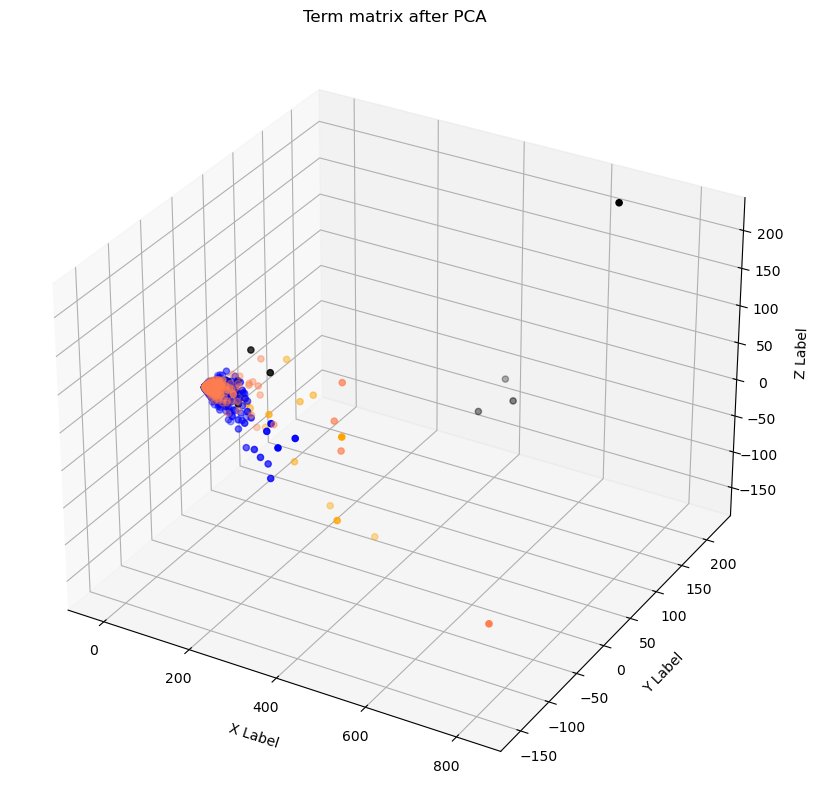

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

# Create points with different colors by categories
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_title("Term matrix after PCA")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

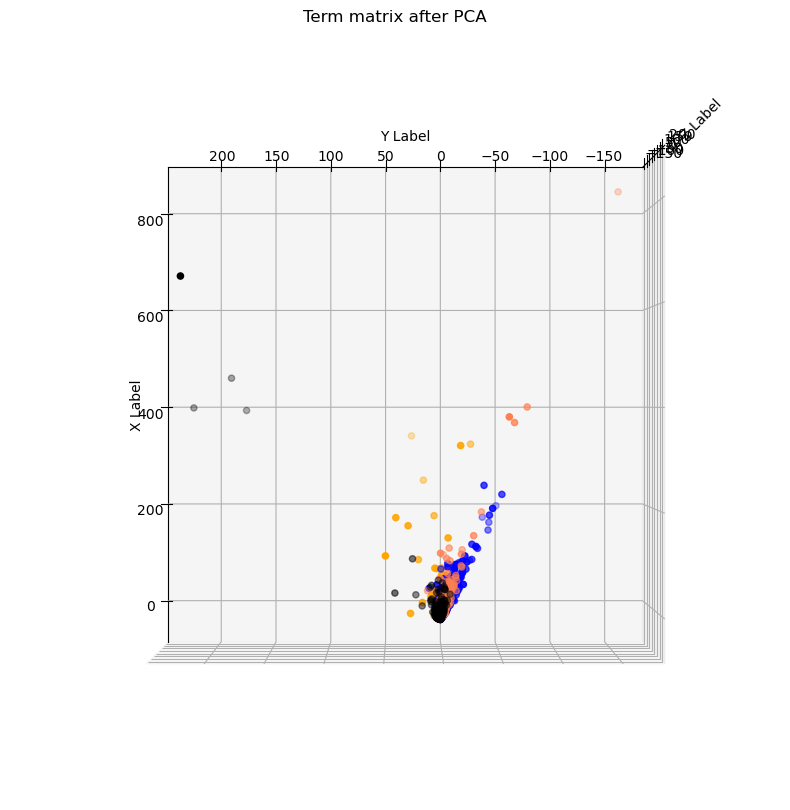

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

# Create points with different colors by categories
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_title("Term matrix after PCA")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=90, azim=180)
plt.show()

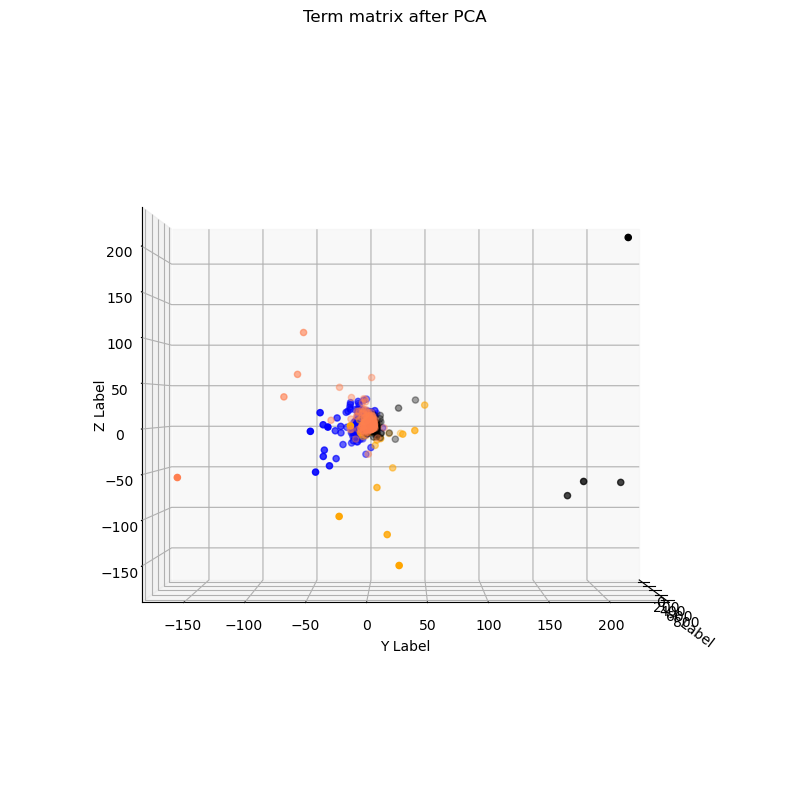

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

col = ['coral', 'blue', 'black', 'orange']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

# Create points with different colors by categories
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_title("Term matrix after PCA")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=0, azim=0)
plt.show()

With an additional dimension added, the data seems clogged together. From top down, we see black points on top of orange, while at bottom we see orange points on top of black. So points are roughly grouped together by color. It seems that these classes can  classified by some means, but using plains to cut points might not be a good idea.

### Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [21]:
import plotly.graph_objects as go

# I use this plot because it have grid lines and is clear
# I also configure plot size to make document terms large enough to see

# Get each term appear times of all documents
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y))
fig.update_layout(width=5000, height=1000)
fig.show()

### Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [22]:
import plotly.graph_objects as go

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df = pd.DataFrame({"freq": term_frequencies, "name": count_vect.get_feature_names_out()})
# Pop all words with frequency < 10, which efficiently reduce the number of terms you want to visualize
df_flitered = df[df["freq"] >= 10]
# Randomly get 300 samples to get more fair at showing data 
df_sample = df_flitered.sample(n=300)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_sample["name"], y=df_sample["freq"]))
fig.update_layout(width=5000, height=1000)
fig.show()

### Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).

In [23]:
import plotly.graph_objects as go

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df = pd.DataFrame({"freq": term_frequencies, "name": count_vect.get_feature_names_out()})
# Sort dataframe row by 'freq' feature in descending order
df_sorted = df.sort_values(by=['freq'], ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_sorted["name"][:300], y=df_sorted["freq"][:300]))
fig.update_layout(width=5000, height=1000)
fig.show()

### Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [24]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

## 2. Second part
Follow the same process from the DM2022-Lab1-Master on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though).

### 2. Data Preparation & 3. Data Transformation

### 3.1 Converting Data into Pandas Dataframe
Note: Since I use ``read_csv()`` function from pandas to read .txt files, and it will generate dataframe already. So I merge part 2 and 3 together. Of course I can read files by ``open()`` function but I think ``read_csv()`` is more efficient.

In [25]:
import pandas as pd
import csv
# Note: There are 3 files we need to get data, with each have 500 positive and negative sentence and score.
# Get data from amazon_cells_labelled.txt into dataframe
amazon_data = pd.read_csv('data/amazon_cells_labelled.txt', sep="\t", lineterminator="\n", header=None, quoting=csv.QUOTE_NONE)
amazon_data.columns = ["sentence", "score"]

# Get data from imdb_labelled.txt into dataframe
imdb_data = pd.read_csv('data/imdb_labelled.txt', sep="\t", header=None, quoting=csv.QUOTE_NONE)
imdb_data.columns = ["sentence", "score"]

# Get data from yelp_labelled.txt into dataframe
yelp_data = pd.read_csv('data/yelp_labelled.txt', sep="\t", lineterminator="\n", header=None, quoting=csv.QUOTE_NONE)
yelp_data.columns = ["sentence", "score"]

# Concat 3 dataframe together into 3000 rows
Y = pd.concat([amazon_data, imdb_data, yelp_data], ignore_index=True)

### Adding Column

In [26]:
# Adding 'score_meaning' column to Y. 'negative' is 0, 'positive' is 1.
category_name = ['negative', 'positive']
Y['score_meaning'] = Y.score.apply(lambda t: category_name[t])
Y

sentence  score score_meaning
0     So there is no way for me to plug it in here i...      0      negative
1                           Good case, Excellent value.      1      positive
2                                Great for the jawbone.      1      positive
3     Tied to charger for conversations lasting more...      0      negative
4                                     The mic is great.      1      positive
...                                                 ...    ...           ...
2995  I think food should have flavor and texture an...      0      negative
2996                           Appetite instantly gone.      0      negative
2997  Overall I was not impressed and would not go b...      0      negative
2998  The whole experience was underwhelming, and I ...      0      negative
2999  Then, as if I hadn't wasted enough of my life ...      0      negative

[3000 rows x 3 columns]

### 4. Data Mining using Pandas

### 4.1 Missing Values

In [27]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

Y.isnull().apply(lambda x: check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        score_meaning  
0  The amoung of missing records is:   
1                                   0

### 4.2 Dealing with Duplicate Data

In [28]:
print("Number of data is", Y.shape[0])
print("Number of duplicates in data is", sum(Y.duplicated()))

Number of data is 3000
Number of duplicates in data is 17


In [29]:
# Drop duplicates in data
Y.drop_duplicates(keep="first", inplace=True)
# Reset Y data index
Y = Y.reset_index(drop=True)

In [30]:
print("Number of data is", Y.shape[0])
print("Number of duplicates in data is", sum(Y.duplicated()))

Number of data is 2983
Number of duplicates in data is 0


### 5. Data Preprocessing

### 5.1 Data distribution

negative    1493
positive    1490
Name: score_meaning, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

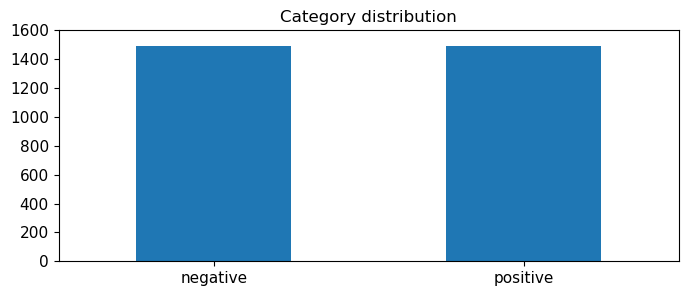

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

print(Y.score_meaning.value_counts())

# plot barchart for X
Y.score_meaning.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### 5.2 Feature Creation

In [32]:
import nltk

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

# Append unigrams of each row to Y
Y['unigrams'] = Y['sentence'].apply(lambda x: tokenize_text(x))
Y

sentence  score score_meaning  \
0     So there is no way for me to plug it in here i...      0      negative   
1                           Good case, Excellent value.      1      positive   
2                                Great for the jawbone.      1      positive   
3     Tied to charger for conversations lasting more...      0      negative   
4                                     The mic is great.      1      positive   
...                                                 ...    ...           ...   
2978  I think food should have flavor and texture an...      0      negative   
2979                           Appetite instantly gone.      0      negative   
2980  Overall I was not impressed and would not go b...      0      negative   
2981  The whole experience was underwhelming, and I ...      0      negative   
2982  Then, as if I hadn't wasted enough of my life ...      0      negative   

                                               unigrams  
0     [So, there, is, no, way, for, me, to, plug, it...  
1                  [Good, case, ,, Excellent, value, .]  
2                         [Great, for, the, jawbone, .]  
3     [Tied, to, charger, for, conversations, lastin...  
4                              [The, mic, is, great, .]  
...                                                 ...  
2978  [I, think, food, should, have, flavor, and, te...  
2979                     [Appetite, instantly, gone, .]  
2980  [Overall, I, was, not, impressed, and, would, ...  
2981  [The, whole, experience, was, underwhelming, ,...  
2982  [Then, ,, as, if, I, had, n't, wasted, enough,...  

[2983 rows x 4 columns]

### 5.3 Feature subset selection

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

Y_count_vect = CountVectorizer()
#learn the vocabulary and return document-term matrix
Y_word_counts = Y_count_vect.fit_transform(Y.sentence)
Y['freq'] = Y_word_counts.toarray().tolist()

print(Y_word_counts.shape)
print(Y_count_vect.get_feature_names_out()[0:10])
Y

(2983, 5155)
['00' '10' '100' '11' '12' '13' '15' '15g' '15pm' '17']


sentence  score score_meaning  \
0     So there is no way for me to plug it in here i...      0      negative   
1                           Good case, Excellent value.      1      positive   
2                                Great for the jawbone.      1      positive   
3     Tied to charger for conversations lasting more...      0      negative   
4                                     The mic is great.      1      positive   
...                                                 ...    ...           ...   
2978  I think food should have flavor and texture an...      0      negative   
2979                           Appetite instantly gone.      0      negative   
2980  Overall I was not impressed and would not go b...      0      negative   
2981  The whole experience was underwhelming, and I ...      0      negative   
2982  Then, as if I hadn't wasted enough of my life ...      0      negative   

                                               unigrams  \
0     [So, there, is, no, way, for, me, to, plug, it...   
1                  [Good, case, ,, Excellent, value, .]   
2                         [Great, for, the, jawbone, .]   
3     [Tied, to, charger, for, conversations, lastin...   
4                              [The, mic, is, great, .]   
...                                                 ...   
2978  [I, think, food, should, have, flavor, and, te...   
2979                     [Appetite, instantly, gone, .]   
2980  [Overall, I, was, not, impressed, and, would, ...   
2981  [The, whole, experience, was, underwhelming, ,...   
2982  [Then, ,, as, if, I, had, n't, wasted, enough,...   

                                                   freq  
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
2978  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2979  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2980  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2981  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2982  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[2983 rows x 5 columns]

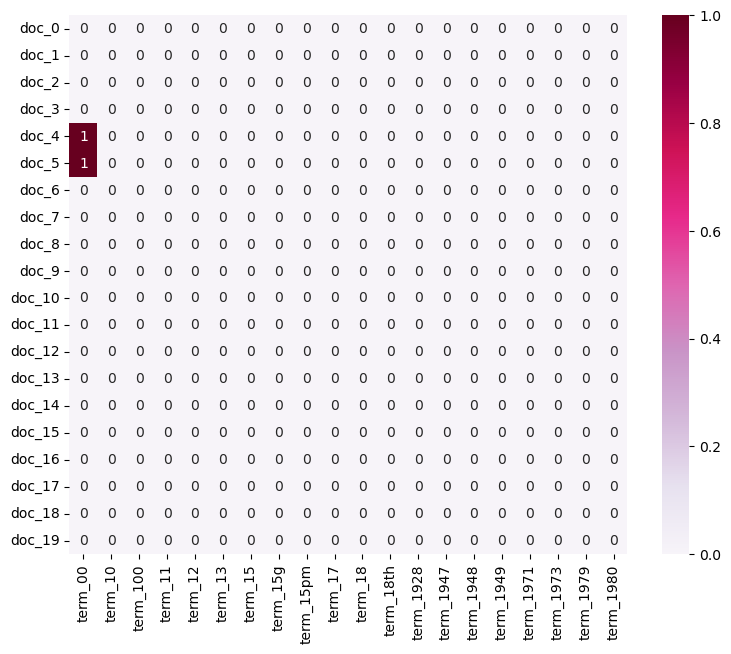

In [34]:
import seaborn as sns

plot_x = ["term_"+str(i) for i in Y_count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(Y.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [35]:
from sklearn.decomposition import PCA
Y_reduced = PCA(n_components = 2).fit_transform(Y_word_counts.toarray())
Y_reduced.shape

(2983, 2)

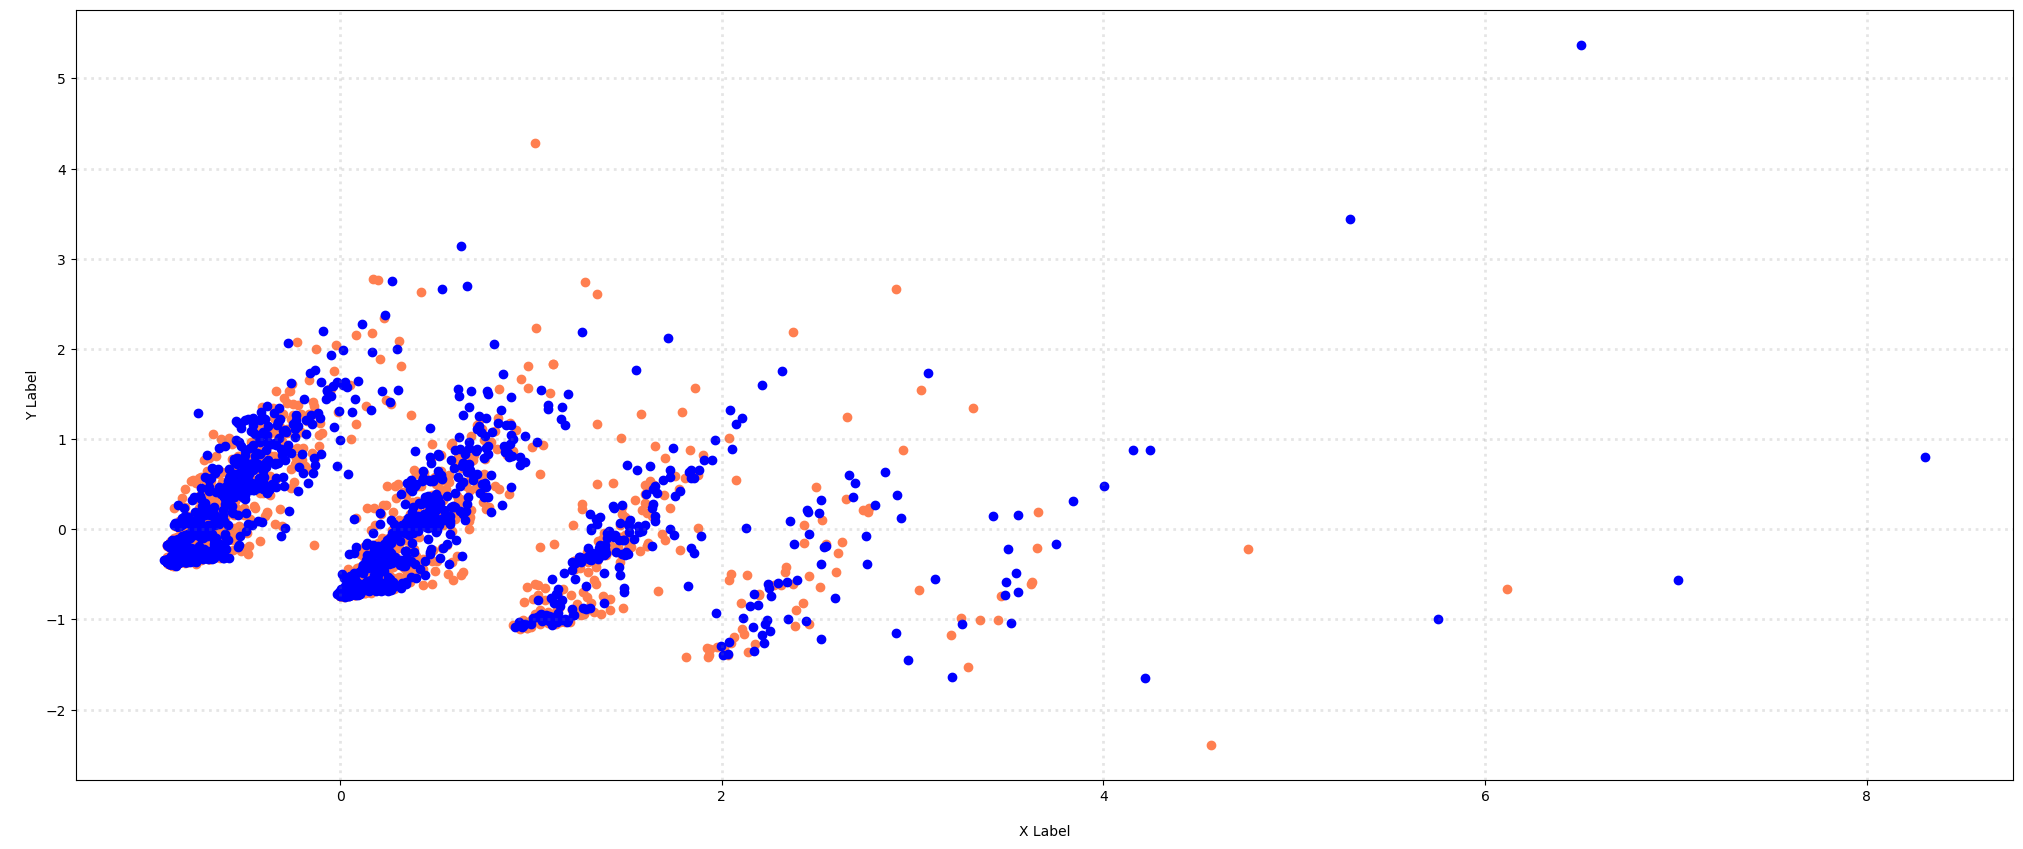

In [36]:
# Color of each category
col = ['coral', 'blue']
category_name = ['negative', 'positive']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

# Create points with different color according to category
for c, category in zip(col, category_name):
    xs = Y_reduced[Y['score_meaning'] == category].T[0]
    ys = Y_reduced[Y['score_meaning'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

# Setting scatter plot attributes
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [37]:
Y_reduced = PCA(n_components = 3).fit_transform(Y_word_counts.toarray())
Y_reduced.shape

(2983, 3)

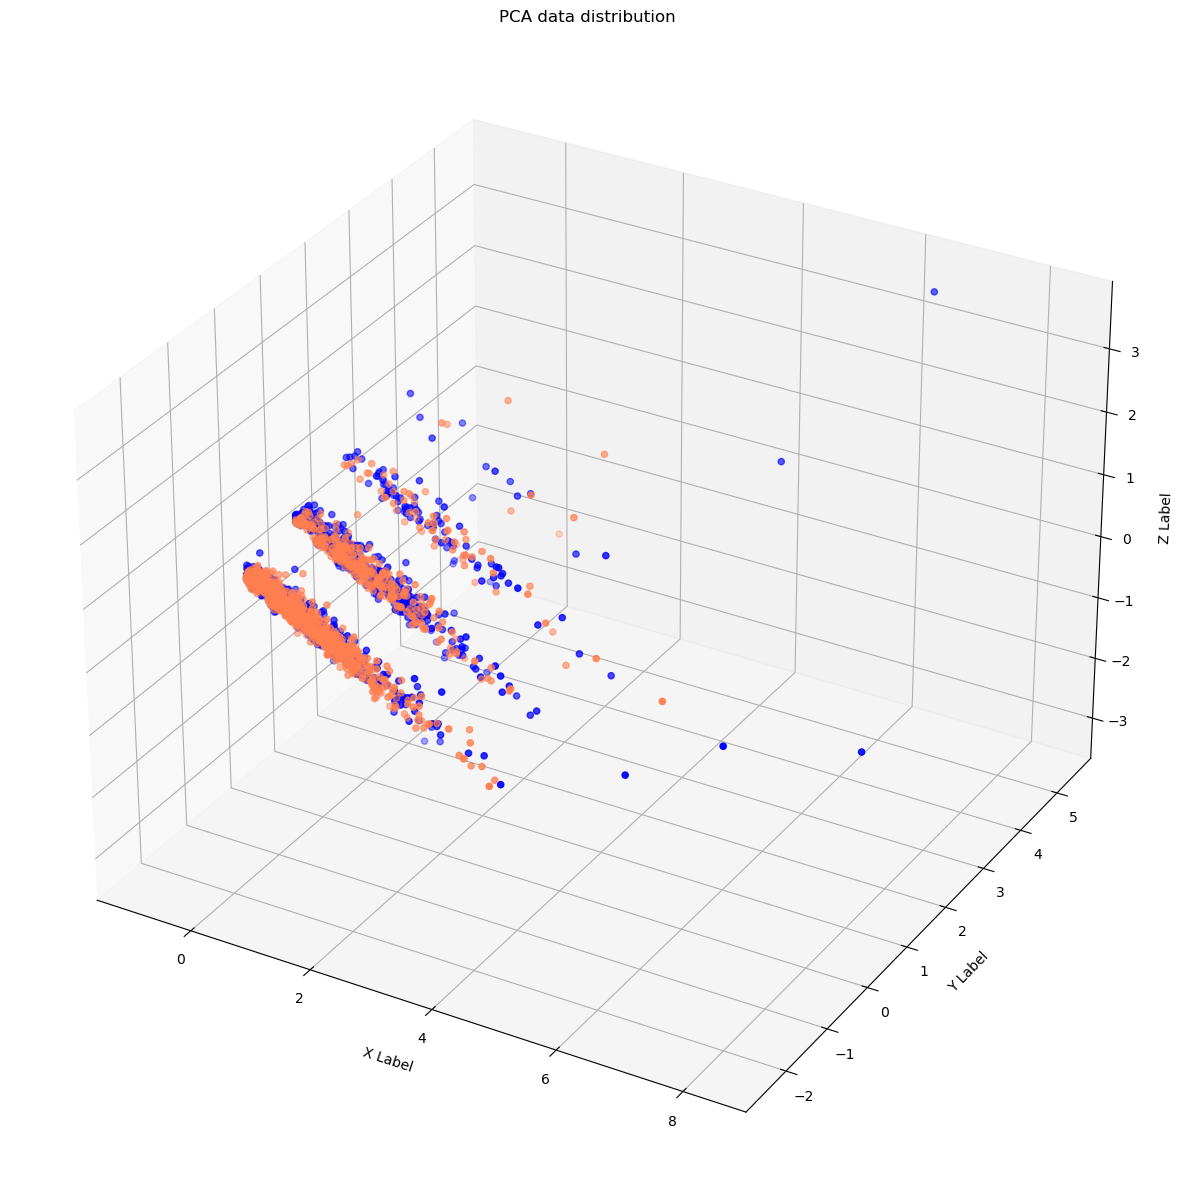

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

col = ['coral', 'blue']
category_name = ['negative', 'positive']

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(projection='3d')

# Creating points by categories
for c, category in zip(col, category_name):
    xs = Y_reduced[Y['score_meaning'] == category].T[0]
    ys = Y_reduced[Y['score_meaning'] == category].T[1]
    zs = Y_reduced[Y['score_meaning'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.set_title("PCA data distribution")
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [39]:
Y_term_frequencies = np.asarray(Y_word_counts.sum(axis=0))[0]
term_frequencies[0]

134

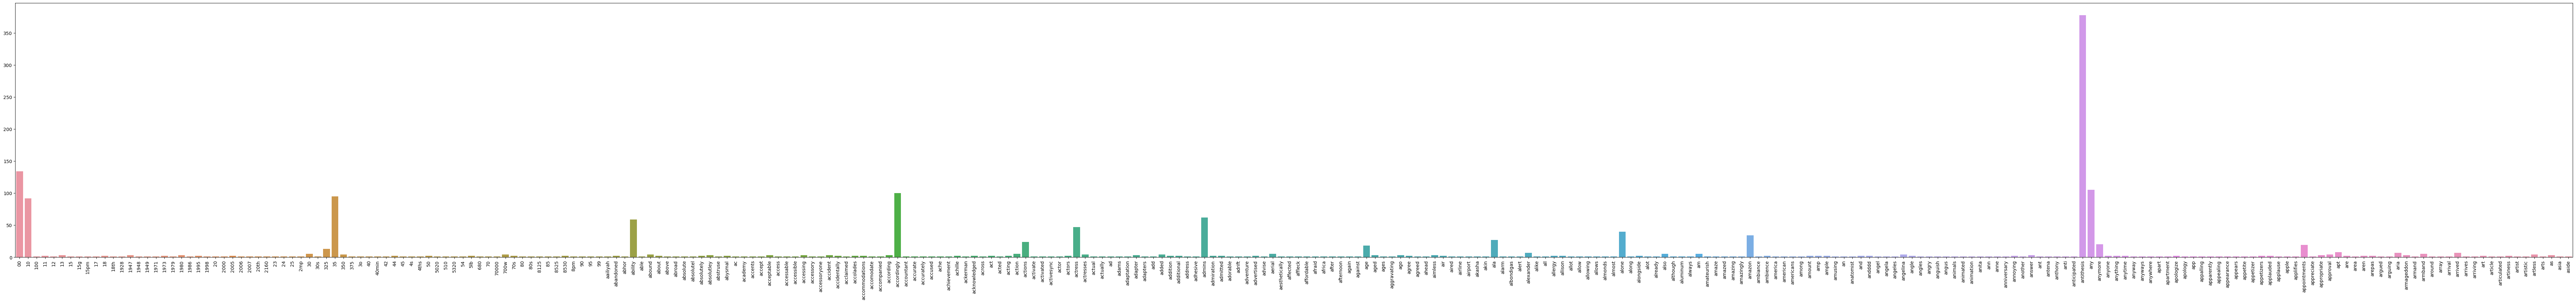

In [40]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=Y_count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(Y_count_vect.get_feature_names_out()[:300], rotation = 90);

In [41]:
# Nicer visualization + descending sorted
import plotly.graph_objects as go
Y_term_frequencies = np.asarray(Y_word_counts.sum(axis=0))[0]

df = pd.DataFrame({"freq": Y_term_frequencies, "name": Y_count_vect.get_feature_names_out()})

df_sorted = df.sort_values(by=['freq'], ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_sorted["name"][:300], y=df_sorted["freq"][:300]))
fig.update_layout(width=5000, height=1000)
fig.show()

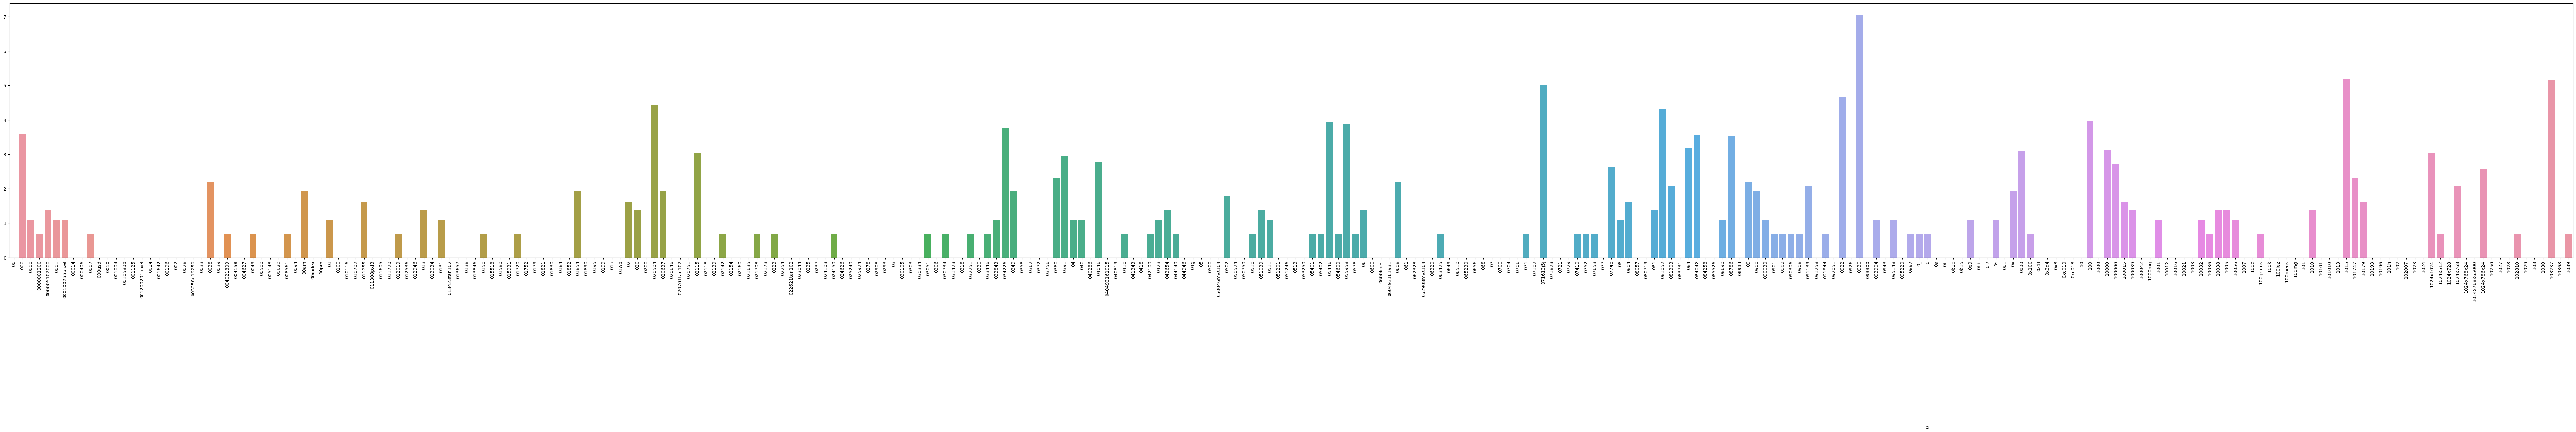

In [42]:
# Log distribution
import math
Y_term_frequencies_log = [math.log(i) for i in Y_term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=Y_term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization

In [43]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(Y.score)
Y['bin_score'] = mlb.transform(Y['score']).tolist()
Y[0:9]

sentence  score score_meaning  \
0  So there is no way for me to plug it in here i...      0      negative   
1                        Good case, Excellent value.      1      positive   
2                             Great for the jawbone.      1      positive   
3  Tied to charger for conversations lasting more...      0      negative   
4                                  The mic is great.      1      positive   
5  I have to jiggle the plug to get it to line up...      0      negative   
6  If you have several dozen or several hundred c...      0      negative   
7        If you are Razr owner...you must have this!      1      positive   
8                Needless to say, I wasted my money.      0      negative   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   
4                           [The, mic, is, great, .]   
5  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  [If, you, have, several, dozen, or, several, h...   
7  [If, you, are, Razr, owner, ..., you, must, ha...   
8    [Needless, to, say, ,, I, wasted, my, money, .]   

                                                freq bin_score  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [1]  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [1]  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [1]  
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]  
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]  
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [1]  
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]

### 6. Data Exploration

In [44]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = Y.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = Y.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = Y.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [45]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [46]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [47]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## 3. Third part
Please attempt the following tasks on the new dataset.

### 1.Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

The new data visualizations I choose is word cloud. Word cloud is many word bundled together in a frame, and term frequency will determine font size. It's pro is fast to generate, very clear, intuitive and pretty. And the stopwords fliter is used to make word cloud more clear.

[nltk_data] Downloading package stopwords to /home/bowen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


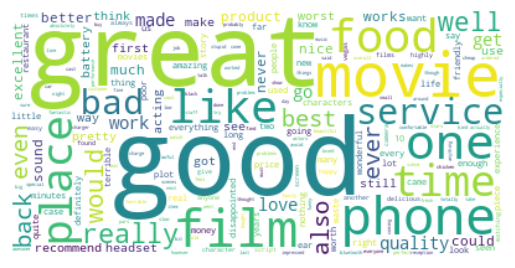

In [48]:
# Draw word cloud from whole dataset
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

text_freq = {}
# Generate dictionary {'term': word_count }
for i in range(Y_term_frequencies.shape[0]):
    text_freq[Y_count_vect.get_feature_names_out()[i]] = Y_term_frequencies[i]

# Flitered out stopwords that is not so contribute to classifier.
for fliter in stopwords.words('english'):
    text_freq.pop(fliter, None)    

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(text_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

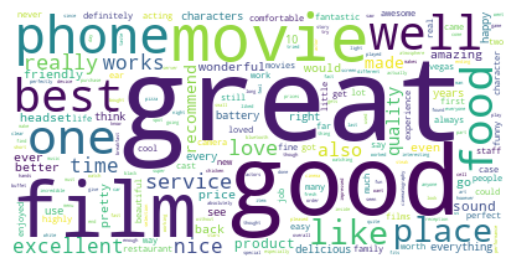

In [49]:
# Draw word cloud with only positive data

# Get only positive data rows in dataset
Y_positive = Y[Y['score_meaning'] == 'positive']

# Get word count matrix
Y_positive_count_vect = CountVectorizer()
Y_positive_word_counts = Y_positive_count_vect.fit_transform(Y_positive.sentence)
# Sum up word counts in each sentence
Y_positive_term_frequencies = np.asarray(Y_positive_word_counts.sum(axis=0))[0]

positive_text_freq = {}
# Generate dictionary {'term': word_count }
for i in range(Y_positive_term_frequencies.shape[0]):
    positive_text_freq[Y_positive_count_vect.get_feature_names_out()[i]] = Y_positive_term_frequencies[i]

for fliter in stopwords.words('english'):
    positive_text_freq.pop(fliter, None)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", stopwords=stopwords).generate_from_frequencies(positive_text_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

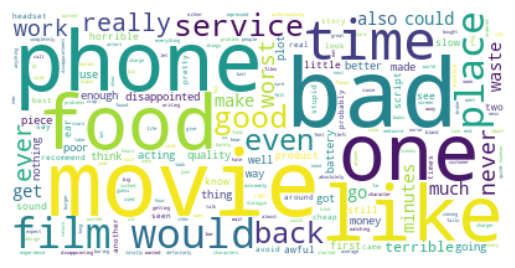

In [50]:
# Draw word cloud with only negative data
from sklearn.feature_extraction.text import CountVectorizer

# Get only negative data rows in dataset
Y_negative = Y[Y['score_meaning'] == 'negative']

# Get word count matrix
Y_negative_count_vect = CountVectorizer()
Y_negative_word_counts = Y_negative_count_vect.fit_transform(Y_negative.sentence)
# Sum up word counts in each sentence
Y_negative_term_frequencies = np.asarray(Y_negative_word_counts.sum(axis=0))[0]

negative_text_freq = {}
# Generate dictionary {'term': word_count }
for i in range(Y_negative_term_frequencies.shape[0]):
    negative_text_freq[Y_negative_count_vect.get_feature_names_out()[i]] = Y_negative_term_frequencies[i]

for fliter in stopwords.words('english'):
    negative_text_freq.pop(fliter, None)
    
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate_from_frequencies(negative_text_freq)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the above word clouds, we can see that in negative reviews, there is some `positive` term inside such as `like`, `good` which is funny. With more observation, this is caused by sentence or phrase such as `not as good`, `The potatoes were like rubber`. Those sentence are hard to determine its meaning by seeing each word independently.

### 2. Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Get Word Frequencies
Y_count_vect = CountVectorizer()
Y_word_counts = Y_count_vect.fit_transform(Y.sentence)

# Get TF-IDF attributes
transformer = TfidfTransformer(smooth_idf=True)
Y_tfidf = transformer.fit_transform(Y_word_counts)
Y['tfidf'] = Y_tfidf.toarray().tolist()
print(Y_tfidf.shape)
Y

(2983, 5155)


sentence  score score_meaning  \
0     So there is no way for me to plug it in here i...      0      negative   
1                           Good case, Excellent value.      1      positive   
2                                Great for the jawbone.      1      positive   
3     Tied to charger for conversations lasting more...      0      negative   
4                                     The mic is great.      1      positive   
...                                                 ...    ...           ...   
2978  I think food should have flavor and texture an...      0      negative   
2979                           Appetite instantly gone.      0      negative   
2980  Overall I was not impressed and would not go b...      0      negative   
2981  The whole experience was underwhelming, and I ...      0      negative   
2982  Then, as if I hadn't wasted enough of my life ...      0      negative   

                                               unigrams  \
0     [So, there, is, no, way, for, me, to, plug, it...   
1                  [Good, case, ,, Excellent, value, .]   
2                         [Great, for, the, jawbone, .]   
3     [Tied, to, charger, for, conversations, lastin...   
4                              [The, mic, is, great, .]   
...                                                 ...   
2978  [I, think, food, should, have, flavor, and, te...   
2979                     [Appetite, instantly, gone, .]   
2980  [Overall, I, was, not, impressed, and, would, ...   
2981  [The, whole, experience, was, underwhelming, ,...   
2982  [Then, ,, as, if, I, had, n't, wasted, enough,...   

                                                   freq bin_score  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [1]   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [1]   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [1]   
...                                                 ...       ...   
2978  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]   
2979  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]   
2980  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]   
2981  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]   
2982  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...       [0]   

                                                  tfidf  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
...                                                 ...  
2978  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2979  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2980  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2981  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2982  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[2983 rows x 7 columns]

### 3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. 

In [52]:
# TF-IDF Naive Bayes classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
# Split training and testing dataset in 8:2
X_tfidf_train, X_tfidf_test, Y_tfidf_train, Y_tfidf_test = train_test_split(Y, Y['score'], test_size=0.2, random_state=None)

# Training TF-IDF classifier
tfidf_clf = MultinomialNB()
tfidf_clf.fit(X_tfidf_train['tfidf'].tolist(), Y_tfidf_train)

# Identify test dataset
tfidf_result = tfidf_clf.predict(X_tfidf_test['freq'].tolist())

# Results
print(metrics.classification_report(tfidf_result, Y_tfidf_test))
print(metrics.confusion_matrix(tfidf_result, Y_tfidf_test))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       289
           1       0.83      0.81      0.82       308

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597

[[238  51]
 [ 59 249]]


In [53]:
# Word frequency Naive Bayes classifier
X_wf_train, X_wf_test, Y_wf_train, Y_wf_test = train_test_split(Y, Y['score'], test_size=0.2, random_state=None)

# Training word frequency classifier
wf_clf = MultinomialNB()
wf_clf.fit(X_wf_train['freq'].tolist(), Y_wf_train)
wf_result = wf_clf.predict(X_wf_test['freq'].tolist())

# Results
print(metrics.classification_report(wf_result, Y_wf_test))
print(metrics.confusion_matrix(wf_result, Y_wf_test))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       315
           1       0.77      0.85      0.81       282

    accuracy                           0.81       597
   macro avg       0.81      0.81      0.81       597
weighted avg       0.81      0.81      0.81       597

[[245  70]
 [ 43 239]]


### Fourth part
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

I think the most inefficient part in the whole preprocessing process is the high dimensionality of the data. In newsgroup part, we have over 50000 features, and in Sentiment Labelled Sentences Dataset, we have over 5000 dimensions. This will cause our feature to be to sparse for training, which affects classifier. I think there is something more we can do:
1. Remove punctuations, special characters, stop words, frequent words. In the master notebook, this part is not included, however I have flitered out stopwords in the new visualization part to get a better view of the data. But emojis should be kept.
2. Lowercasing all texts, to make our data more managble, since uppercase and lowercase of a word usually does not affect classification results.
3. Tense like `watch`, `watched`, `watching` have same meaning and may have little impact on positive or negative reviews, so we can try to merge them into same feature. However some phrase like `raining cat and dogs` have different meaning should be treated carefully.
4. There may have some spelling error, which is irrelevant to our classifier.
5. Deal with URLS, for example, the text data contains email addresses, which have little or hugh impact on classifying. (Ex. email's author maybe write about same topic in different article. Or website is about some specific topic)

Also, I believe that Multinominal Naive Bayes has its limitations, as it treats each word in a sentence independently. But each word is very likely to have strong relations with other words in sentence. Such as `very good` and `not as good` have opposite meaning and cannot split into words to identify. It is best to consider phrase as new feature.